In [120]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A

from torchvision import transforms
from torchvision.transforms import Resize, ToTensor, Normalize

In [121]:
# 테스트 데이터셋 폴더 경로를 지정해주세요.
test_dir = '/opt/ml/input/data/eval'
train_dir = '/opt/ml/input/data/train'

In [122]:
csv_path = os.path.join(train_dir, 'train.csv')
csv = pd.read_csv(csv_path)
image_dir = os.path.join(train_dir, 'images')
pathlist = csv['path']
pathlist

0       000001_female_Asian_45
1       000002_female_Asian_52
2         000004_male_Asian_54
3       000005_female_Asian_58
4       000006_female_Asian_59
                 ...          
2695      006954_male_Asian_19
2696      006955_male_Asian_19
2697      006956_male_Asian_19
2698      006957_male_Asian_20
2699      006959_male_Asian_19
Name: path, Length: 2700, dtype: object

In [123]:
image_path = []
for p in pathlist:
    if int(p.split('_')[-1]) < 60:
        continue
    images = [os.path.join(*[image_dir, p, image]) for image in os.listdir(os.path.join(image_dir, p)) if not image[:1] == '.']
    for image in images:
        image_path.append(image)
len(image_path) # 2880개 -> 192명

2880

In [141]:
total = len(image_path)
tf = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.6),
        A.augmentations.crops.transforms.RandomCrop (450, 300, p=5),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=15, p=0.6),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=20, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.2, p=0.6),
        A.GaussNoise(p=0.5),
        A.OpticalDistortion(p=0.5),
        A.MotionBlur(p=0.5),
    ])

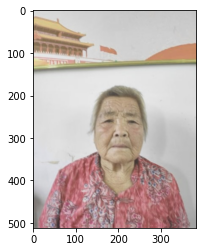

In [142]:
test = image_path[300]
image = cv2.imread(test)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

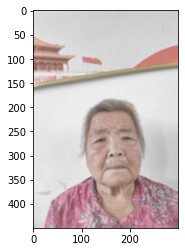

In [164]:
plt.imshow(tf(image=image)['image'])

In [165]:
for num, path in enumerate(image_path):
    if num % 50 == 0:
        print(num + 1, '/', total)
    # plt.imshow(image)
    for i in range(5):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        splitted = path.split('.')
        filename = splitted[0] + '_' + str(i+1) + '.' + splitted[1]
        image_after = tf(image=image)['image']
        image_after = cv2.cvtColor(image_after, cv2.COLOR_RGB2BGR)
        cv2.imwrite(filename, image_after)

1 / 2880
51 / 2880
101 / 2880
151 / 2880
201 / 2880
251 / 2880
301 / 2880
351 / 2880
401 / 2880
451 / 2880
501 / 2880
551 / 2880
601 / 2880
651 / 2880
701 / 2880
751 / 2880
801 / 2880
851 / 2880
901 / 2880
951 / 2880
1001 / 2880
1051 / 2880
1101 / 2880
1151 / 2880
1201 / 2880
1251 / 2880
1301 / 2880
1351 / 2880
1401 / 2880
1451 / 2880
1501 / 2880
1551 / 2880
1601 / 2880
1651 / 2880
1701 / 2880
1751 / 2880
1801 / 2880
1851 / 2880
1901 / 2880
1951 / 2880
2001 / 2880
2051 / 2880
2101 / 2880
2151 / 2880
2201 / 2880
2251 / 2880
2301 / 2880
2351 / 2880
2401 / 2880
2451 / 2880
2501 / 2880
2551 / 2880
2601 / 2880
2651 / 2880
2701 / 2880
2751 / 2880
2801 / 2880
2851 / 2880
